本文我们主要讨论一下自定义实现线性回归以及使用sklearn如何实现线性回归。

线性回归的模型比较简单，本文就不再细述：

$$
\hat{y} = \theta \cdot X = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$(i)

回归模型大多使用均方根误差RMSE作为性能指标，但在实践中，将均方误差MSE最小化比将RMSE简单的多，而且效果相同。所以线性回归的成本函数为：
$$
MSE = (X, h_\theta) = \frac{1}{m}\sum_{i=1}^m(\theta^T x^{(i)} - y^{(i)})^2
$$

我们先生成一些线性但加上一些随机噪声的数据：

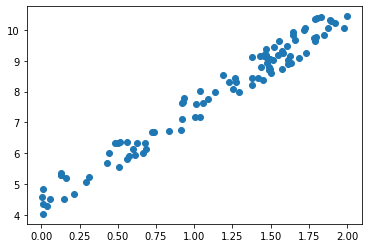

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

X = 2 * numpy.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
plt.scatter(X,y)


## 1、标准方程

线性回归有一个标准方程解：

$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$

根据上述方程解，使用numpy的线性代数模块np.linalg中的inv()函数来对矩阵求逆，并用dot()方法计算矩阵内积，即可求解上述方程：

In [16]:
X_b = np.c_[np.ones((100,1)), X] # 增加常数项x_0
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
                    
                    

[[4.43818364]
 [3.04076207]]


上述结果和我们期待的[4,3]已经非常接近。我们用上述$\theta$做出预测并画图：

In [22]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.43818364]
 [10.51970777]]


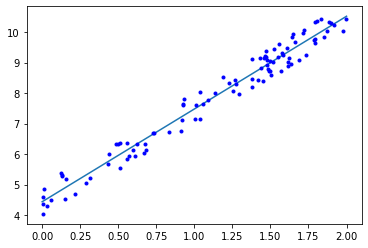

In [24]:
plt.plot(X_new, y_predict)
plt.plot(X, y, "b.")
plt.show()

## 2、sklearn的方式
标准方程的复杂度为O(n^2.4)到O(n^3)之间，sklearn使用的是SVD方式，复杂度约为O(n^2)。

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.43818364] [[3.04076207]]


## 3、梯度下降

In [28]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

[[4.43818364]
 [3.04076207]]


## 4、随机梯度下降

NameError: name 'save_fig' is not defined

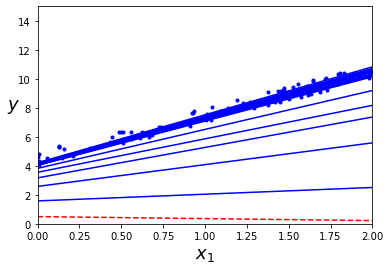

In [29]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
#save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [30]:
print(theta)

[[4.44102612]
 [3.03340558]]
